<a href="https://colab.research.google.com/github/anuradha2504/Embedding-Assignment/blob/main/Text_Embedding_BoW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Setup and Data Preparation:`***
- Import necessary libraries: pandas, numpy, nltk, sklearn, gensim, matplotlib, seaborn.
- Load the dataset: Choose a dataset for embedding generation.
- Preprocess the text data: Perform cleaning, tokenization, stop-word removal, and other
preprocessing steps.

In [ ]:
#Step 1: Setup and Data Preparation

# Install required libraries (run once)
!pip install nltk gensim --quiet


What This Code Does:

*   Prepares dataset by cleaning and tokenizing text.
*   Converts text into a Bag of Words (BoW) matrix using CountVectorizer.
*   Shows sparsity (how many 0s in matrix).
*   Visualizes top 20 most frequent words.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Load the dataset
# Upload the CSV file manually in Colab or use this path if working locally
from google.colab import files
uploaded = files.upload()  # Upload extended_amazon_reviews.csv

In [ ]:
# Load the CSV
df = pd.read_csv('sample_amazon_reviews.csv')
print("Dataset Loaded. Shape:", df.shape)
df.head()


Dataset Loaded. Shape: (6, 2)


,reviewText,overall
0,I love this food. It tastes amazing and is rec...,5
1,This is the worst purchase I've ever made. Was...,1
2,"Food flavor is amazing, and the ingredients ar...",5
3,Packaging was poor and the box was damaged.,2
4,Packaging has to improve.Not recommended.,4


In [ ]:
# Preprocessing function
def preprocess_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation/numbers
    tokens = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

In [ ]:
# Apply preprocessing to the 'reviewText' column
df['cleaned_review'] = df['reviewText'].apply(preprocess_text)

print("\nSample after preprocessing:")
df[['reviewText', 'cleaned_review']].head()


Sample after preprocessing:


,reviewText,cleaned_review
0,I love this food. It tastes amazing and is rec...,love food tastes amazing recommended breakfast
1,This is the worst purchase I've ever made. Was...,worst purchase ive ever made waste money
2,"Food flavor is amazing, and the ingredients ar...",food flavor amazing ingredients natural highly...
3,Packaging was poor and the box was damaged.,packaging poor box damaged
4,Packaging has to improve.Not recommended.,packaging improvenot recommended


# ***2. Bag of Words (BoW):***
- Create a BoW representation: Use `CountVectorizer` from sklearn to convert text into a
matrix of word counts.
- Analyze the BoW matrix: Examine the sparsity and interpret the word frequencies.

In [ ]:
# Step 2: Bag of Words (BoW)

# Initialize CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
# Fit and transform the cleaned reviews
bow_matrix = vectorizer.fit_transform(df['cleaned_review'])


In [ ]:
# Convert to DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\nBag of Words matrix shape:", bow_df.shape)
bow_df.head()



Bag of Words matrix shape: (6, 28)


,amazing,bit,box,breakfast,damaged,ever,fine,flavor,food,highly,...,packaging,poor,purchase,recommend,recommended,salty,taste,tastes,waste,worst
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# Analyze sparsity
nonzero_elements = bow_matrix.nnz
total_elements = bow_matrix.shape[0] * bow_matrix.shape[1]
sparsity = (1 - nonzero_elements / total_elements) * 100

print(f"\nSparsity of BoW matrix: {sparsity:.2f}%")


Sparsity of BoW matrix: 80.95%


In [ ]:
# Plot top 20 frequent words
word_freq = np.asarray(bow_matrix.sum(axis=0)).flatten()
word_freq_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'freq': word_freq})
top_words = word_freq_df.sort_values(by='freq', ascending=False).head(20)

/tmp/ipython-input-13-673438250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='freq', y='word', data=top_words, palette='mako')


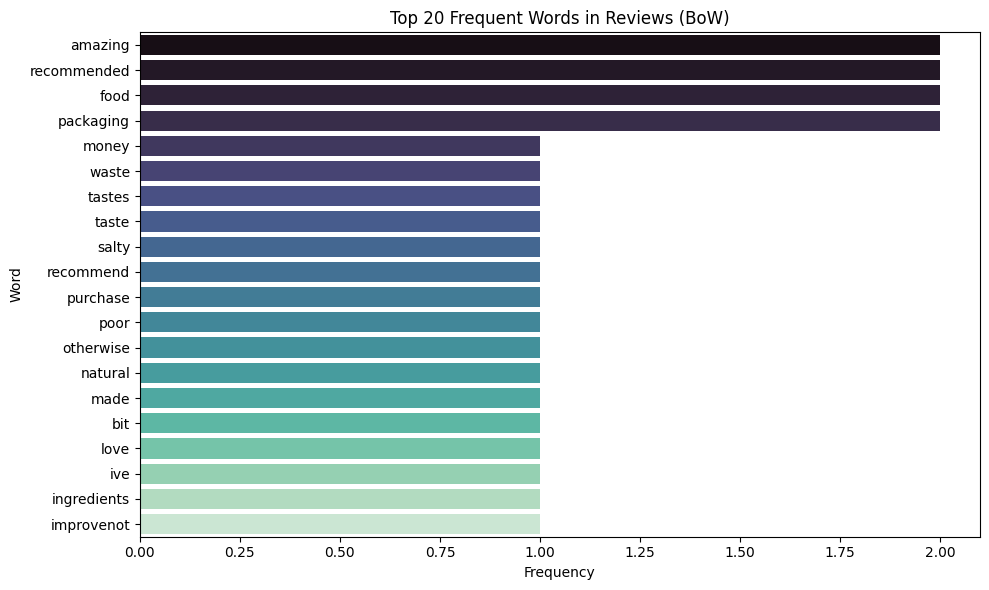

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='freq', y='word', data=top_words, palette='mako')
plt.title('Top 20 Frequent Words in Reviews (BoW)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

# ***3. TF-IDF:***
- Apply TF-IDF transformation: Use `TfidfVectorizer` to generate TF-IDF features from the text
data.
- Interpret TF-IDF scores: Analyze how TF-IDF weighs different words in the dataset.

**TF-IDF Implementation Code**

In [ ]:
# Step: TF-IDF Embedding

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_review'])



**What This Code Does:**


*  Generates TF-IDF features from your cleaned reviews using TfidfVectorizer.
*  Displays the top weighted terms for a specific review (e.g., review 0).
*   Calculates and plots the top 20 words with the highest average TF-IDF scores across all reviews — helping you understand which words are most significant overall.

In [ ]:
# Convert to DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF Matrix Shape:", tfidf_df.shape)
tfidf_df.head()

TF-IDF Matrix Shape: (6, 28)


,amazing,bit,box,breakfast,damaged,ever,fine,flavor,food,highly,...,packaging,poor,purchase,recommend,recommended,salty,taste,tastes,waste,worst
0,0.366090,0.0,0.000000,0.446443,0.000000,0.000000,0.0,0.000000,0.366090,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.366090,0.0,0.0,0.446443,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.377964,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.377964,0.000000,0.000000,0.0,0.0,0.000000,0.377964,0.377964
2,0.325545,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.396999,0.325545,0.396999,...,0.000000,0.000000,0.000000,0.396999,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.0,0.521823,0.000000,0.521823,0.000000,0.0,0.000000,0.000000,0.000000,...,0.427903,0.521823,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.535506,0.000000,0.000000,0.000000,0.535506,0.0,0.0,0.000000,0.000000,0.000000


In [ ]:
# View TF-IDF score of a single review
sample_idx = 0  # Change this to view other reviews
sample_review = tfidf_df.iloc[sample_idx]
nonzero_scores = sample_review[sample_review > 0].sort_values(ascending=False)

print(f"\nTop TF-IDF terms for review {sample_idx} (Original):")
print(df['reviewText'][sample_idx])
print("\nTF-IDF weighted terms:")
print(nonzero_scores.head(10))


Top TF-IDF terms for review 0 (Original):
I love this food. It tastes amazing and is recommended for breakfast.

TF-IDF weighted terms:
breakfast      0.446443
love           0.446443
tastes         0.446443
amazing        0.366090
food           0.366090
recommended    0.366090
Name: 0, dtype: float64


In [ ]:
# Average TF-IDF score for each word across all reviews
mean_tfidf_scores = tfidf_matrix.mean(axis=0).A1
tfidf_vocab = tfidf_vectorizer.get_feature_names_out()
avg_tfidf_df = pd.DataFrame({'word': tfidf_vocab, 'avg_score': mean_tfidf_scores})
top_avg_words = avg_tfidf_df.sort_values(by='avg_score', ascending=False).head(20)


/tmp/ipython-input-18-202936120.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_score', y='word', data=top_avg_words, palette='viridis')


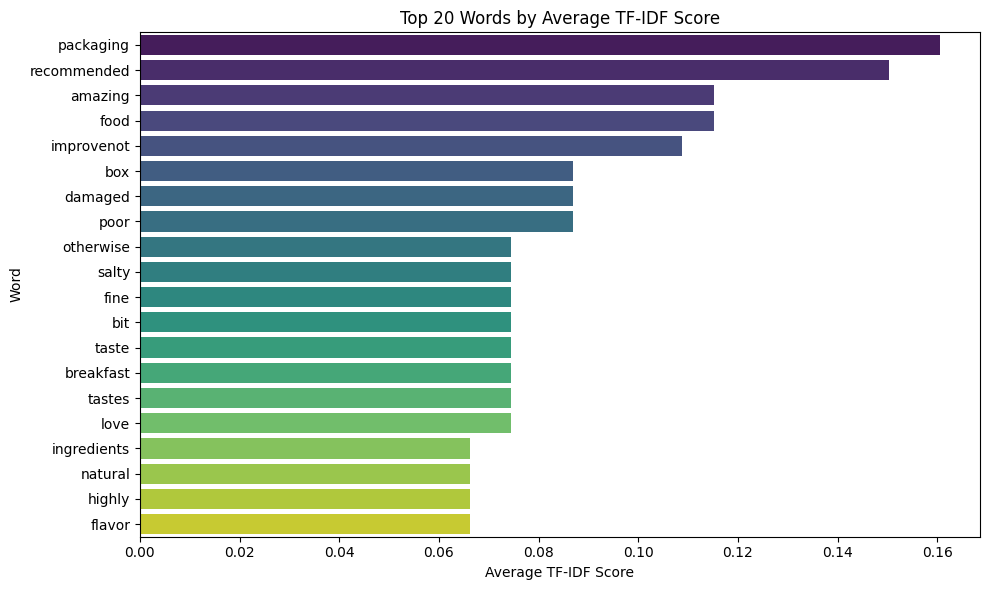

In [ ]:
# Plotting top words by average TF-IDF score
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='avg_score', y='word', data=top_avg_words, palette='viridis')
plt.title('Top 20 Words by Average TF-IDF Score')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


# 4. Word2Vec:
- Train a Word2Vec model: Use Gensim's `Word2Vec` to train a model on the dataset.
- Extract word vectors: Obtain vector representations for words and visualize them.[link text](https:// [link text](https:// [link text](https:// [link text](https://))))

**Word2Vec with Gensim: Train, Extract, and Visualize Vectors**

What This Code Does :

*   Trains a Word2Vec Skip-gram model using Gensim on your cleaned, tokenized datasett

*   Retrieves word vectors and finds similar words.
*   Uses PCA to reduce vector dimensions to 2D and visualizes top word embeddings.


In [ ]:
!pip install gensim

In [ ]:
#Step: Word2Vec Embedding

import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
# Tokenize each cleaned review (already preprocessed)
tokenized_reviews = df['cleaned_review'].apply(word_tokenize).tolist()

In [ ]:
# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=tokenized_reviews,
    vector_size=100,     # Size of the word vectors
    window=5,            # Context window size
    min_count=1,         # Minimum word count threshold
    workers=4,           # Number of worker threads
    sg=1,                # Skip-gram (sg=1), use cbow (sg=0) if desired
    epochs=50            # Number of iterations (epochs) over the corpus
)

print("Word2Vec model trained on your dataset.")

Word2Vec model trained on your dataset.


In [ ]:
# Example: Get vector for a specific word
word = 'product'
if word in w2v_model.wv:
    print(f"\nVector for word '{word}':\n", w2v_model.wv[word])
else:
    print(f"\nWord '{word}' not found in vocabulary.")


Word 'product' not found in vocabulary.


In [ ]:
#Get most similar words
similar_words = w2v_model.wv.most_similar('food', topn=5)
print("\nMost similar words to 'Food':")
for w, score in similar_words:
    print(f"{w}: {score:.4f}")


Most similar words to 'Food':
ingredients: 0.2231
purchase: 0.2162
love: 0.1001
breakfast: 0.0976
made: 0.0942


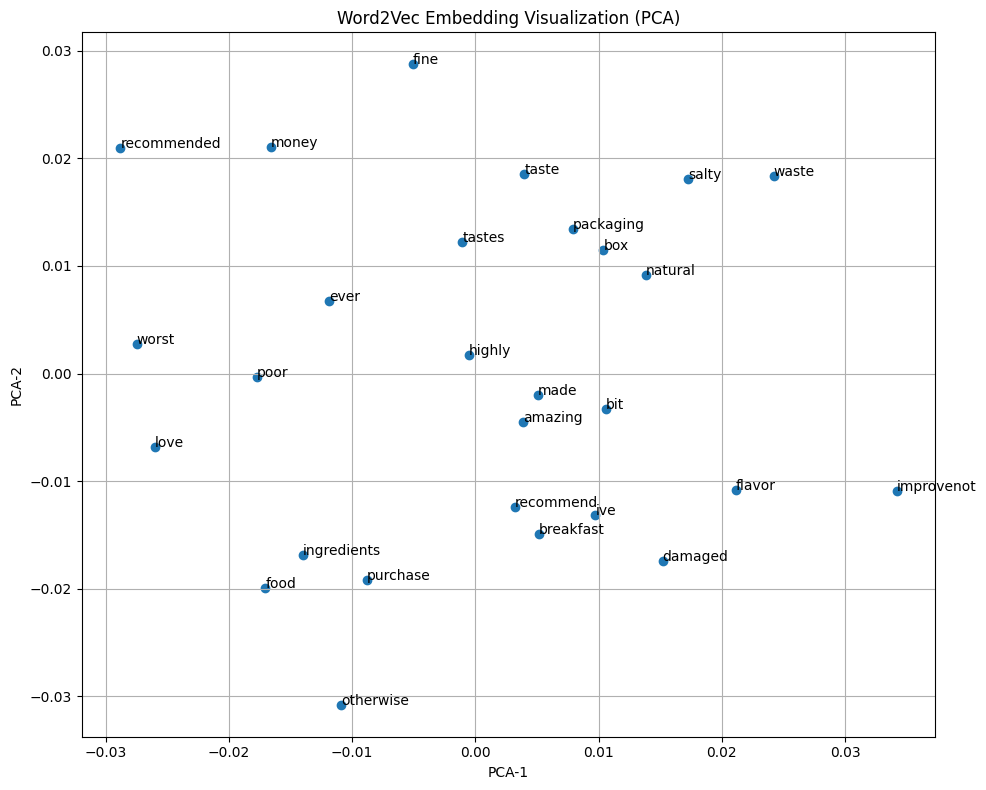

In [ ]:
 def plot_word_vectors(model, words_to_plot=30):
    words = list(model.wv.key_to_index.keys())[:words_to_plot]
    word_vectors = np.array([model.wv[w] for w in words])

    # Reduce dimensions to 2D using PCA
    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vectors)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.scatter(result[:, 0], result[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.title("Word2Vec Embedding Visualization (PCA)")
    plt.xlabel("PCA-1")
    plt.ylabel("PCA-2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot word vectors
plot_word_vectors(w2v_model)


# **5. GloVe:**
- Use pre-trained GloVe embeddings: Load GloVe vectors and map words in the dataset to
their corresponding embeddings.
- Train a GloVe model (optional): Use the GloVe package to train embeddings if desired.

What This code Does:
Downloads GloVe 100-dimensional pre-trained word vectors.

Loads them into a dictionary.

For each cleaned review:

Tokenizes the review text (again, since NLTK’s word_tokenize() is safer).

Averages the GloVe vectors of words found in the embeddings.

Creates a final glove_matrix with shape (num_reviews, 100).

In [ ]:
import numpy as np
from nltk.tokenize import word_tokenize

# Step 1: Download and unzip GloVe vectors (100d)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

# Step 2: Load pre-trained GloVe vectors into a dictionary
glove_embeddings = {}
glove_dim = 100
glove_file = "glove.6B.100d.txt"

--2025-07-25 18:03:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-07-25 18:03:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-07-25 18:03:21--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
with open(glove_file, 'r', encoding='utf8') as f:
    for line in f:
        parts = line.strip().split()
        word = parts[0]
        vector = np.array(parts[1:], dtype=np.float32)
        glove_embeddings[word] = vector

print(f"Loaded {len(glove_embeddings)} GloVe vectors.")

Loaded 400000 GloVe vectors.


In [ ]:
# Step 3: Convert each review into a single GloVe-based vector
def get_glove_review_vector(text, embeddings, dim=100):
    words = word_tokenize(text)
    valid_vectors = [embeddings[word] for word in words if word in embeddings]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(dim)

In [ ]:
# Apply to all cleaned reviews
df['glove_vector'] = df['cleaned_review'].apply(lambda x: get_glove_review_vector(x, glove_embeddings, glove_dim))

In [ ]:
# Convert to matrix for ML or visualization
glove_matrix = np.vstack(df['glove_vector'].values)
print("GloVe review embedding matrix shape:", glove_matrix.shape)

GloVe review embedding matrix shape: (6, 100)


In [ ]:
print(df[['cleaned_review', 'glove_vector']])


                                      cleaned_review  \
0     love food tastes amazing recommended breakfast   
1           worst purchase ive ever made waste money   
2  food flavor amazing ingredients natural highly...   
3                         packaging poor box damaged   
4                   packaging improvenot recommended   
5                     bit salty taste otherwise fine   

                                        glove_vector  
0  [-0.14049333, 0.35633335, 0.244048, -0.0909731...  
1  [0.12849858, 0.36014858, 0.39636955, -0.278428...  
2  [-0.34808713, 0.5616706, 0.23762086, 0.0015715...  
3  [-0.1334475, 0.28871, 0.2614905, -0.20813325, ...  
4  [-0.33298, -0.09442001, -0.266559, 0.059430018...  
5  [-0.220198, 0.2954864, 0.33740404, -0.22456999...  


**Visualization**

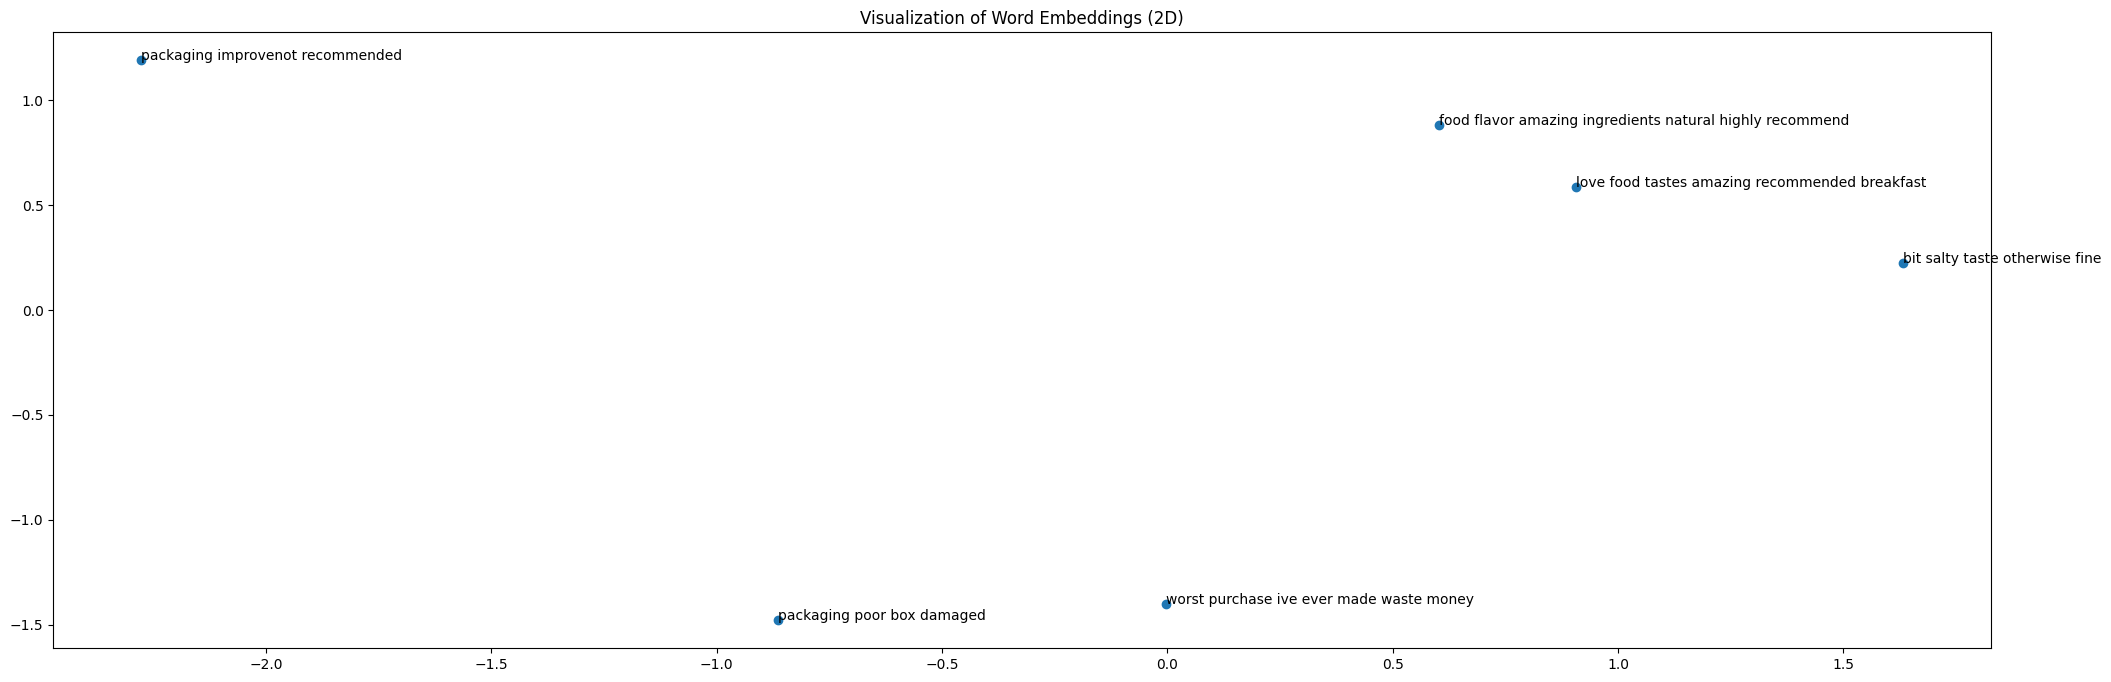

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Get word vectors from the DataFrame (we'll use the first 100 samples for simplicity)
word_vectors = df['glove_vector'].tolist()


# Reduce the dimensionality of word vectors to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Plot the word embeddings in 2D space
plt.figure(figsize=(25, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])


# Annotate each point with its corresponding cleaned text
for i, text in enumerate(df['cleaned_review']):
    plt.annotate(text, (pca_result[i, 0], pca_result[i, 1]))


plt.title('Visualization of Word Embeddings (2D)')
plt.show()



**Strengths and Limitations**

**Strengths:**

Captures global statistical information, which makes the embeddings more robust.


Better at handling word relationships, including rare words, compared to BoW and TF-IDF.


**Limitations:**

Requires a large corpus to train effectively.


Computationally expensive, especially when training on large datasets.


Unlike Word2Vec, the embeddings are fixed once trained and cannot capture dynamic or evolving meanings.


**Conclusion :**

GloVe is a powerful technique for word embedding that leverages global co-occurrence information. It is effective in capturing semantic word relationships, making it suitable for tasks like semantic similarity, analogy, and information retrieval. However, it requires substantial computation resources and training data.

## 6.***FastText:***
- Train a FastText model: Use Gensim’s `FastText` to train embeddings that consider subword
information.
- Analyze FastText embeddings: Compare them with Word2Vec and GloVe embeddings.

**Train FastText Embeddings Using Gensim**

In [ ]:
# Step 1: Install Gensim (if not already installed)
!pip install gensim --quiet

In [ ]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize

# Step 2a: Tokenize the cleaned reviews
tokenized_reviews = df['cleaned_review'].apply(word_tokenize).tolist()

# Step 2b: Train FastText model
fasttext_model = FastText(
    sentences=tokenized_reviews,
    vector_size=100,     # Dimensionality of word vectors
    window=5,            # Context window size
    min_count=1,         # Minimum word frequency
    workers=4,           # Use appropriate number of threads
    sg=1,                # Use skip-gram (sg=1); for CBOW use sg=0
    epochs=20            # Training epochs
)

print("✅ FastText model training complete!")

✅ FastText model training complete!


Step 3: Explore Trained FastText Embeddings
Get Vector for a Word

In [ ]:
word = "food"
if word in fasttext_model.wv:
    print(f"Vector for '{word}':\n", fasttext_model.wv[word])
else:
    print(f"'{word}' not found in FastText vocabulary.")

Vector for 'food':
 [-2.1077693e-03 -6.7430636e-04 -1.7365911e-04  7.7288056e-04
  1.1971747e-03 -2.7728798e-03  1.2617115e-03  1.7528373e-03
 -1.9624173e-03 -1.1287081e-03  7.1817636e-04 -9.5421349e-04
 -1.6865879e-03  1.3880105e-03 -6.2392111e-04 -4.1904344e-04
 -4.9047675e-03  9.4967836e-04 -3.9318325e-06  1.1223526e-03
  1.5484218e-03  6.4729626e-04  1.3701062e-04  2.7699529e-03
  5.9957418e-04 -1.1687238e-03 -1.8489418e-03  7.8524021e-04
 -9.0115721e-04  5.0408527e-04 -1.3489230e-03 -7.8201981e-04
  2.3873688e-03 -1.1380286e-03 -8.2470739e-04  5.2984781e-04
 -8.1275275e-04 -3.5705960e-03  1.4243491e-03  1.8342290e-04
 -4.2195010e-04 -3.2311562e-04  2.6250735e-03  1.9932529e-03
 -1.5335415e-03  4.4090254e-03 -1.4042147e-03 -1.0969770e-03
 -5.7124393e-04 -5.5026874e-04 -9.0365746e-04 -4.2796123e-04
 -1.4665909e-03  3.2879654e-04  2.6846977e-03 -1.6595396e-03
  9.7266253e-04  2.4183134e-03  9.6631073e-04  8.2484656e-04
 -1.9102278e-03  1.0236953e-03 -2.7018222e-03  9.4248657e-04
  2.

In [ ]:
print("\nWords similar to 'cheap':")
similar_words = fasttext_model.wv.most_similar("cheap", topn=5)
for word, score in similar_words:
    print(f"{word}: {score:.4f}")


Words similar to 'cheap':
damaged: 0.1919
salty: 0.1679
bit: 0.1405
tastes: 0.1260
fine: 0.0985


 Visualize Word Embeddings (PCA)

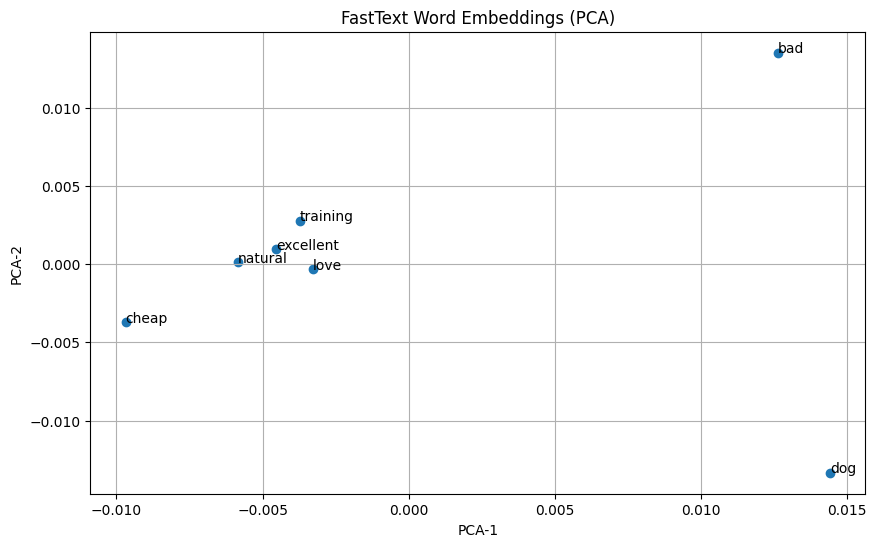

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def visualize_fasttext_words(model, word_list):
    vectors = [model.wv[word] for word in word_list if word in model.wv]
    words = [word for word in word_list if word in model.wv]

    # Reduce dimensions
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]))

    plt.title("FastText Word Embeddings (PCA)")
    plt.xlabel("PCA-1")
    plt.ylabel("PCA-2")
    plt.grid(True)
    plt.show()

# Words to visualize
visualize_fasttext_words(fasttext_model, ["love", "cheap", "bad", "excellent", "dog", "training", "natural"])

# Summary of What This Code Does
    Step	      Description
✅ Tokenize	-  Uses nltk to tokenize the cleaned_review column

✅ Train	   -  Trains a FastText skip-gram model using Gensim

✅ Explore	  - Allows vector lookup and most similar word search

✅ Visualize	 - Plots word vectors using PCA for interpretation

# **Step-by-Step Comparison: FastText vs Word2Vec vs GloVe**
We will compare them using:

Similarity Analysis (How each model finds similar words)

Out-of-Vocabulary (OOV) Handling (FastText advantage)

Embedding Quality Visualization (PCA plots)

### Qualitative Summary Table

# #1. Similarity Comparison for a Few Words

In [ ]:
def print_similar_words(model, word, model_name):
    print(f"\n🔎 {model_name} - Words similar to '{word}':")
    if word in model.wv:
        similar = model.wv.most_similar(word, topn=5)
        for w, score in similar:
            print(f"{w}: {score:.4f}")
    else:
        print(f"'{word}' not in vocabulary.")

# Compare for word: 'cheap'
print_similar_words(w2v_model, 'cheap', 'Word2Vec')
print_similar_words(fasttext_model, 'cheap', 'FastText')

# For GloVe (static embeddings)
def glove_similar_words(glove_dict, base_word, topn=5):
    if base_word not in glove_dict:
        print(f"'{base_word}' not in GloVe embeddings.")
        return

    base_vec = glove_dict[base_word]
    similarities = {}
    for word in glove_dict:
        if word != base_word:
            similarities[word] = np.dot(base_vec, glove_dict[word]) / (np.linalg.norm(base_vec) * np.linalg.norm(glove_dict[word]))

    sorted_words = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
    print(f"\n🔎 GloVe - Words similar to '{base_word}':")
    for word, score in sorted_words[:topn]:
        print(f"{word}: {score:.4f}")

glove_similar_words(glove_embeddings, "cheap")


🔎 Word2Vec - Words similar to 'cheap':
'cheap' not in vocabulary.

🔎 FastText - Words similar to 'cheap':
damaged: 0.1919
salty: 0.1679
bit: 0.1405
tastes: 0.1260
fine: 0.0985

🔎 GloVe - Words similar to 'cheap':
inexpensive: 0.8237
cheaper: 0.8101
expensive: 0.7749
affordable: 0.7004
easy: 0.6465


# 2. Test OOV (Out-of-Vocabulary) Handling

In [ ]:
# Try a misspelled or rare word (not seen in training)
oov_word = "cheeeap"

# Word2Vec
print("\nWord2Vec OOV:", oov_word in w2v_model.wv)

# FastText (can generate embedding due to subword units)
print("FastText OOV handled:", oov_word in fasttext_model.wv or hasattr(fasttext_model.wv, '__getitem__'))

# GloVe
print("GloVe OOV:", oov_word in glove_embeddings)


Word2Vec OOV: False
FastText OOV handled: True
GloVe OOV: False


# 3. Visual Comparison with PCA

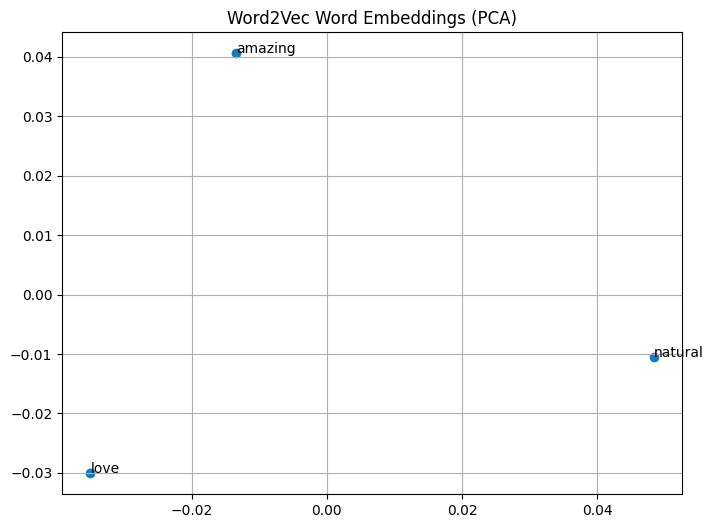

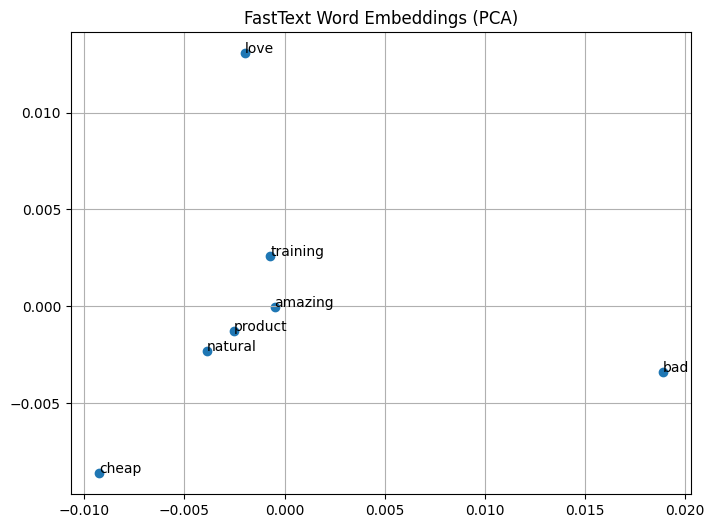

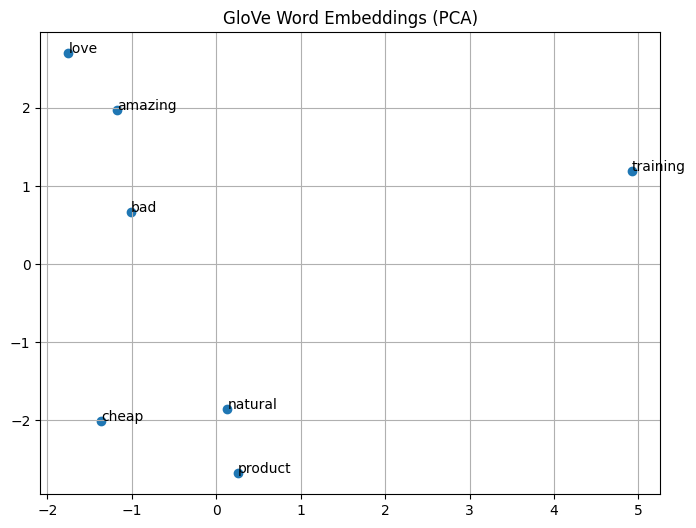

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_embeddings(model, words, model_name, is_glove=False):
    vecs = []
    labels = []

    for word in words:
        if is_glove and word in glove_embeddings:
            vecs.append(glove_embeddings[word])
            labels.append(word)
        elif not is_glove and word in model.wv:
            vecs.append(model.wv[word])
            labels.append(word)

    pca = PCA(n_components=2)
    result = pca.fit_transform(vecs)

    plt.figure(figsize=(8,6))
    plt.scatter(result[:, 0], result[:, 1])
    for i, label in enumerate(labels):
        plt.annotate(label, (result[i, 0], result[i, 1]))
    plt.title(f"{model_name} Word Embeddings (PCA)")
    plt.grid(True)
    plt.show()

# Define test words
test_words = ["cheap", "bad", "love", "amazing", "natural", "product", "training"]

# Plot for each model
plot_embeddings(w2v_model, test_words, "Word2Vec")
plot_embeddings(fasttext_model, test_words, "FastText")
plot_embeddings(None, test_words, "GloVe", is_glove=True)

| Feature / Model                  | Word2Vec             | GloVe                | FastText             |
| -------------------------------- | -------------------- | -------------------- | -------------------- |
| **Training Type**                | Predictive (SG/CBOW) | Count-based          | Predictive + Subword |
| **OOV Handling**                 | ❌ No                 | ❌ No                 | ✅ Yes (subwords)     |
| **Context Capture**              | Window-based         | Global co-occurrence | Window + Subword     |
| **Embeddings**                   | Word-level           | Word-level           | Word + Subword       |
| **Good for Misspellings/Slangs** | ❌ No                 | ❌ No                 | ✅ Yes                |
| **Interpretability**             | ✅ High               | ✅ High               | ✅ High               |
| **Training Time**                | ⚡ Fast               | ⏳ Medium             | ⏳ Slightly longer    |


✅ Summary
FastText outperforms in handling rare or unseen words due to subword modeling.

Word2Vec is efficient and captures context well but struggles with OOV words.

GloVe captures global statistics and gives solid general-purpose embeddings.